In [10]:
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
plt.style.use('fivethirtyeight')
from fri import plot_dendrogram_and_intervals
from fri import plot

%matplotlib inline
from fri import genClassificationData
#X,y = genClassificationData(n_samples=200, n_features=20,n_strel=4, n_redundant=8,
#                    n_repeated=0, flip_y=0,random_state=2,partition=[4,4])

X,y =  genClassificationData(n_samples=200, n_features=5,n_strel=2, n_redundant=0,
                    n_repeated=0, flip_y=0,random_state=3)

Generating dataset with d=5,n=200,strongly=2,weakly=0, partition of weakly=None


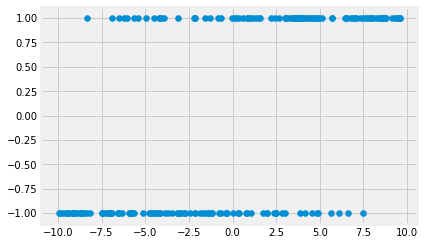

In [11]:
plt.scatter(X[:,0],y)

In [12]:
rel = X[:,0].copy()

n = len(X)
s1 = np.zeros(n)
s2 = np.zeros(n)

division = int(n/5)

s1[:division] = X[:division,0]

s2[division:] = X[division:,0]

X[:,2] = s1
X[:,3] = s2

from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

In [13]:
from fri import FRIClassification
fri = FRIClassification(optimum_deviation=0.2,parallel=True)

In [14]:
fri.fit(X_scaled,y)

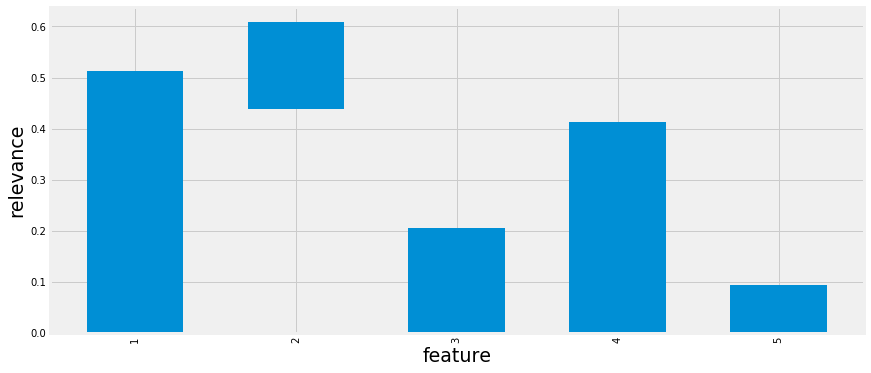

In [15]:

p = plot.plotIntervals(fri.interval_)

In [16]:
fri.interval_

array([[ 0.        ,  0.51335256],
       [ 0.43894575,  0.60809532],
       [ 0.        ,  0.20536336],
       [ 0.        ,  0.41253074],
       [ 0.        ,  0.09302032]])

In [17]:
from exp_tools import *

# New community detection using  constrained problems

In [18]:
clust, link, dist_mat = fri.community_detection2(X_scaled,y)

In [19]:
clust

array([1, 3, 2, 1, 4], dtype=int32)

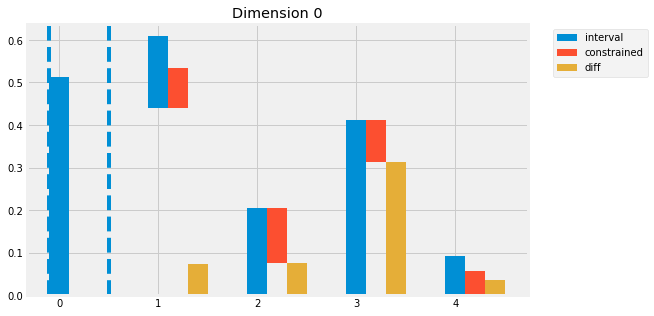

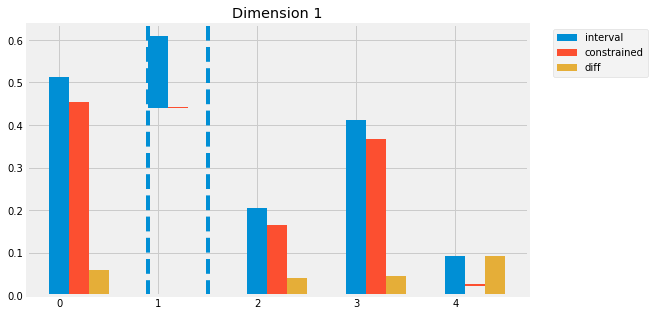

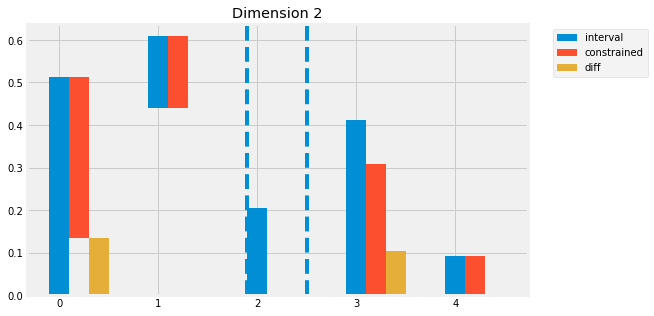

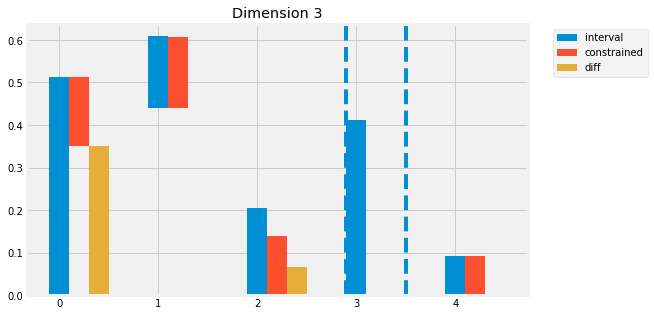

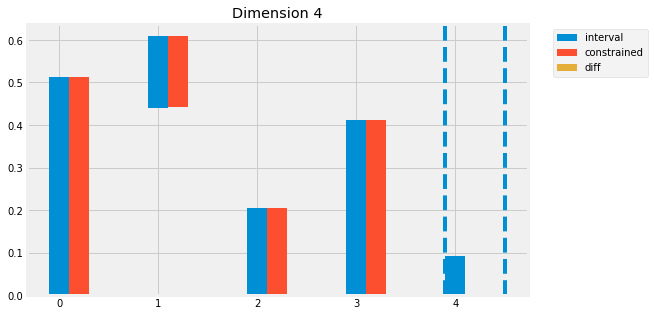

In [20]:
for d in range(X.shape[1]):
    ints = fri.interval_
    conr = fri.constrained_ranges_min
    condiff = fri.constrained_ranges_diff_min[d]
    plotbars([ints,conr[d],condiff],["interval","constrained","diff"],X,d)

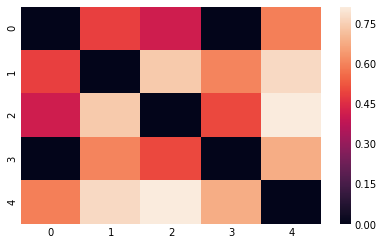

In [21]:
sns.heatmap(dist_mat)

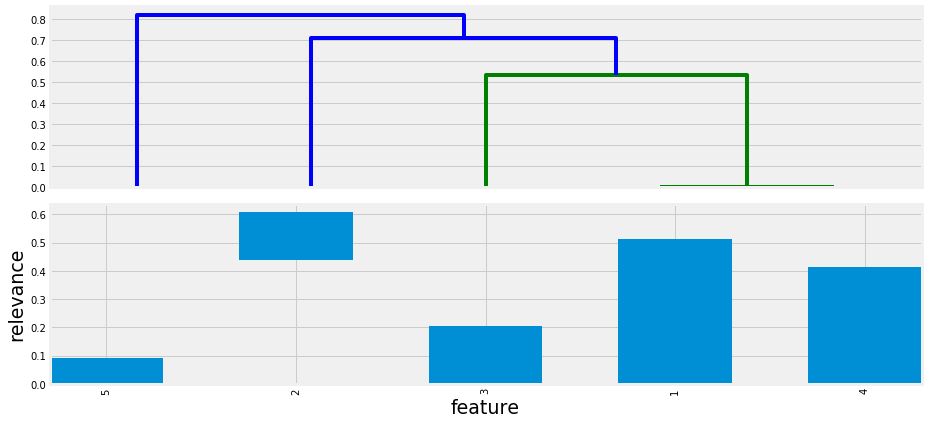

In [22]:
p = plot_dendrogram_and_intervals(fri.interval_,link)

# Old community detection using differnce between optimal solution and unconstrained problem

In [23]:
clust, link, dist_mat = fri.community_detection()

In [24]:
clust

array([1, 2, 1, 1, 3], dtype=int32)

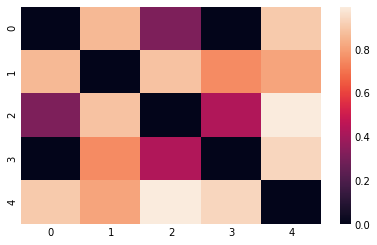

In [25]:
sns.heatmap(dist_mat)

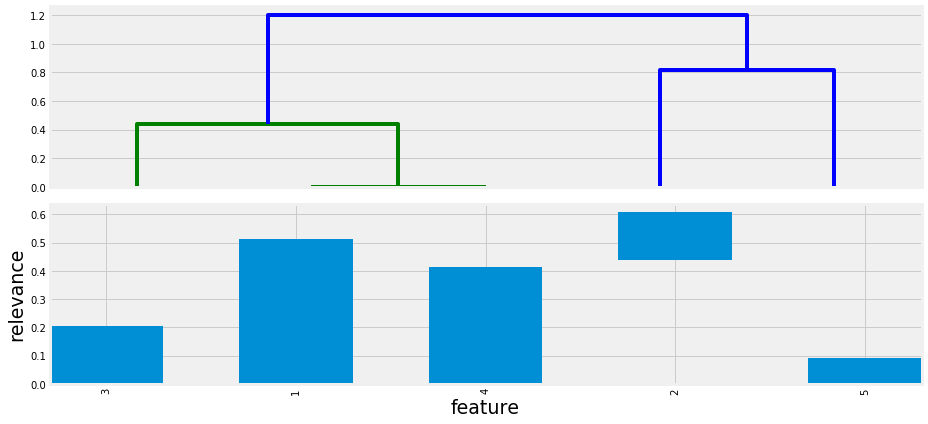

In [26]:
p = plot_dendrogram_and_intervals(fri.interval_,link)

# Simple Correlation 

/home/lpfannschmidt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  # This is added back by InteractiveShellApp.init_path()


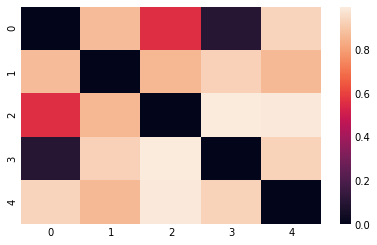

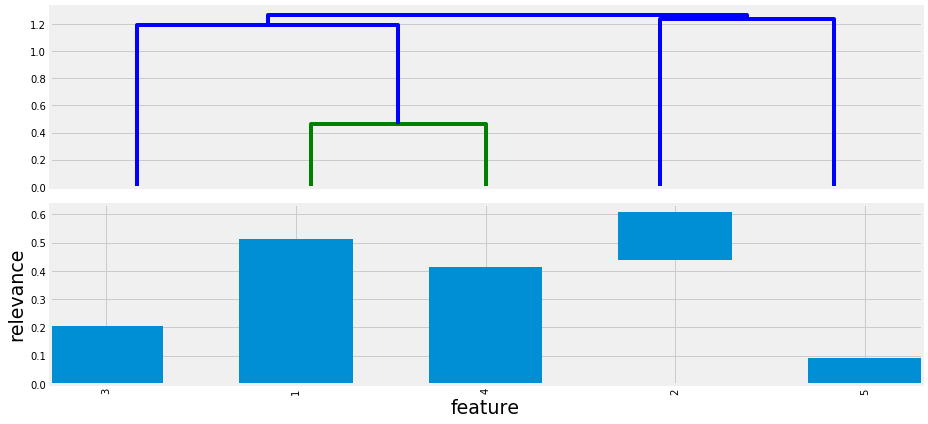

In [27]:
import pandas as pd
corr_pd = pd.DataFrame(X_scaled).corr()

corr_pd = 1-corr_pd.abs()
corr_pd = corr_pd.values

sns.heatmap(corr_pd)

from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage
z = linkage(corr_pd,method="single")
threshold = 0.55*np.max(z[:, 2])
p = plot.plot_dendrogram_and_intervals(fri.interval_,z)

In [28]:
 pd.DataFrame(X_scaled).corr()

,0,1,2,3,4
0,1.000000,0.125008,0.442438,0.898347,-0.064520
1,0.125008,1.000000,0.137805,0.071891,-0.132137
2,0.442438,0.137805,1.000000,0.003513,-0.010188
3,0.898347,0.071891,0.003513,1.000000,-0.066954
4,-0.064520,-0.132137,-0.010188,-0.066954,1.000000
